<a href="https://colab.research.google.com/github/EmanuelViltre/ProyectoFinal.DS/blob/main/PrimeraEntrega%2BElton_Viltre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción**


1.   Niveles de aplicación.
2.   Contexto comercial.
3.   Contexto analítico.
4.   Preguntas a resolver.



**Nivel de aplicación:** El análisis se encuentra orientado a ser utilizado a nivel táctico, es decir,
por los Lideres de la empresa o aquellos que tomen las decisiones. 
El análisis contempla la necesidad del analista de obtener una visión general del nuevo mercado donde se quiere incorporar. Tomando como objetivo el poder comprender a profundidad las verticales de la produccion automotriz y poder diseñar de acción.

**Contexto Comercial:** La empresa que analizamos los datos quiere introducirse al sector automotriz, es un mercado nuevo para ellos  y necesita una estimación de exactamente qué variables afectan los precios de los automóviles. 
En este análisis determinaremos qué tipo y que caracteristicas deberia tener un auto para mantener un costo bajo.







**Contexto analítico.** Se proporciona un archivo CSV que contiene detalles sobre cada marca de vehiculo, caracteristicas del mismo, fabricante, etc. Realizaremos las siguientes tareas con los datos:

Extraer datos, leer, transformar, preparar datos para su visualización, realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.


**Preguntas a resolver.** El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Proporcionaremos visualizaciones para sustentar nuestras hipotesis frente a las siguientes sentencias:

*   ¿Qué variables son significativas para predecir el precio de un automóvil?
*   ¿Qué tan bien describen esas variables el precio de un automóvil?
*   ¿Cual es un auto “ideal” para salir al mercado que no conocemos?
*   ¿Cuáles son los vehículos mas baratos y cuales son sus características?
*   ¿Qué hace la competencia? 

# **Carga de datos y librerías a utilizar**

In [ ]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import cm
from matplotlib import colors
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


mpl.style.use('bmh')

In [ ]:
from google.colab import files
files.upload ()

Saving scrap price.csv to scrap price.csv


{'scrap price.csv': b'ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price\r\n1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495\r\n2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500\r\n3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500\r\n4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950\r\n5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450\r\n6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,1

# **Limpieza de datos**


1.   Identificamos si es que DB contiene nulls.
2.   Identificamos si es que DB contiene duplicados.
3.   Reorganizamos el Index.
4.   Modificamos el nombre de los autos ya que en la base de datos contenía modelo y fabricante, a nosotros nos interesa identificar solamente fabricante.
5.   Modificamos los errores ortograficos del DB.

In [ ]:
df_cars=pd.read_csv('scrap price.csv', sep= ",")
print(df_cars.head())

   ID  symboling                      name fueltypes aspiration doornumbers  \
0   1          3        alfa-romero giulia       gas        std         two   
1   2          3       alfa-romero stelvio       gas        std         two   
2   3          1  alfa-romero Quadrifoglio       gas        std         two   
3   4          2               audi 100 ls       gas        std        four   
4   5          2                audi 100ls       gas        std        four   

       carbody drivewheels enginelocation  wheelbase  ...  enginesize  \
0  convertible         rwd          front       88.6  ...         130   
1  convertible         rwd          front       88.6  ...         130   
2    hatchback         rwd          front       94.5  ...         152   
3        sedan         fwd          front       99.8  ...         109   
4        sedan         4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0    

In [ ]:
df_cars.isnull().sum() 

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df_cars.duplicated() 

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [ ]:
df_cars.index = df_cars['ID'] 
df_cars = df_cars.drop('ID', axis='columns')
print(df_cars.head())

    symboling                      name fueltypes aspiration doornumbers  \
ID                                                                         
1           3        alfa-romero giulia       gas        std         two   
2           3       alfa-romero stelvio       gas        std         two   
3           1  alfa-romero Quadrifoglio       gas        std         two   
4           2               audi 100 ls       gas        std        four   
5           2                audi 100ls       gas        std        four   

        carbody drivewheels enginelocation  wheelbase  carlength  ...  \
ID                                                                ...   
1   convertible         rwd          front       88.6      168.8  ...   
2   convertible         rwd          front       88.6      168.8  ...   
3     hatchback         rwd          front       94.5      171.2  ...   
4         sedan         fwd          front       99.8      176.6  ...   
5         sedan         4wd  

In [ ]:
unique_name = df_cars['name'].apply(lambda x : x.split(' ')[0])                                   

In [ ]:
df_cars.insert(3,'unique_name', unique_name) 

In [ ]:
print(df_cars.head())

    symboling                      name fueltypes  unique_name aspiration  \
ID                                                                          
1           3        alfa-romero giulia       gas  alfa-romero        std   
2           3       alfa-romero stelvio       gas  alfa-romero        std   
3           1  alfa-romero Quadrifoglio       gas  alfa-romero        std   
4           2               audi 100 ls       gas         audi        std   
5           2                audi 100ls       gas         audi        std   

   doornumbers      carbody drivewheels enginelocation  wheelbase  ...  \
ID                                                                 ...   
1          two  convertible         rwd          front       88.6  ...   
2          two  convertible         rwd          front       88.6  ...   
3          two    hatchback         rwd          front       94.5  ...   
4         four        sedan         fwd          front       99.8  ...   
5         four  

In [ ]:
df_cars['unique_name'] = df_cars['unique_name'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})  

In [ ]:
df_cars.drop('name', inplace=True, axis=1) 

# **Análisis de los datos (EDA)**



1.   Rango de precios.
2.   Variables que afectan significativamente el precio.
3.   Ques es lo que hace la competencia.
4.   Agrupación de Variables para entender los precios.
5.   Outliers.


## **Rango de precios**

Una vez realizada la limpieza de datos y dejarlos  listos para el análisis, podemos identificar como primera instancia  que el rango promedio de precios varía entre los valores de 5k a 28k, superando los 30k determinamos aquellos como outliers, como Jaguar, Buick, Porsche, BMW, Marcas de primera línea que no son parte de las aspiraciones principales de la empresa. 

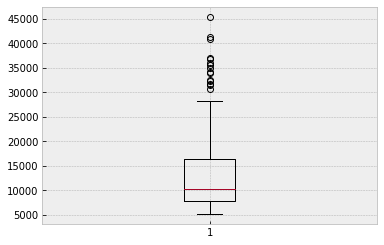

<Figure size 720x504 with 0 Axes>

In [ ]:
plt.boxplot(df_cars['price']) 
fig = plt.figure(figsize =(10, 7))


## **Variables que afectan significativamente al precio**


Las principales variables que son significativas para el precio de un vehículo son **‘horse-power’, 'car-lenght, 'car-width', 'engine-size', 'curb-weight'**.
Si bien otras variables hay que tener en cuenta, estas son las principales que generan una diferencia considerable en el precio al momento de cómo se debería estructurar un auto para salir al mercado. 


In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df_cars.corr(),cmap='coolwarm',annot=True,linewidth=.5)

## **Qué es lo que hace la competencia**

En el siguiente gráfico podemos observar que hay 5 categorías de vehículos, las cuales las dos principales en producción son Sedan y Hatchback.

In [ ]:
df_cars.carbody.value_counts().plot(kind='bar',color='b')


El principal sistema de combustible que utiliza la competencia en los motores de los vehículos que estamos analizando es mpfi, seguido por 2bbl.

In [ ]:
df_cars.fuelsystem.value_counts().plot(kind='bar',color='b')

En el siguiente gráfico podemos observar que el RPM máximo de vehículos domina entre las 5500 y 4800.



In [ ]:
df_cars.peakrpm.value_counts().plot(kind='bar',color='g')

En este gráfico claramente la localizacion del motor es frontal.


In [ ]:
df_cars.enginelocation.value_counts().plot(kind='bar',color='b')

Los vehículos de aspiración "std" (Standard) son los que predominan frente a los que poseen Turbo.

In [ ]:
df_cars.aspiration.value_counts().plot(kind='bar',color='b')

En el siguiente gráfico podemos observar que Toyota es quien lleva la delantera en producción seguido por Nissan. (siendo estos vehiculos de gama media)

> 



In [ ]:
df_cars.unique_name.value_counts().plot(kind='bar',color='b') 

En el siguiente gráfico de barras representamos las marcas que se encuentran en el mercado, cada barra representa el volumen de producción de un tipo de vehículo diferenciándolos por colores.

In [ ]:
sns.displot(df_cars, x="unique_name", hue="carbody", multiple="dodge", height= 10) 
plt.xticks(rotation=90) 


## **Agrupación de Variables para entender los precios**
¿Cual es un auto “ideal” para salir al mercado que no conocemos?

¿Cuáles son los vehículos más baratos y cuales son sus características?

En el conjunto de gráficos que representamos a continuación, agrupamos las variables por el valor promedio del precio, tomando los valores más bajos ya que nos importa mantener un costo bajo de producción.

Analizando diferentes variables contrastandolas con el precio, el vehiculo mas barato seria representado de la siguiente forma:



1.   Fuel Type: Gas
2.   Aspiration: STD
3.   Door Numbers: 2 (No hay demasiada diferencia con 4 puertas, y quizas 4 puertas tenga un valor agregado para el consumidor final)
4.   Body Car: Hatchback
5.   Drive Wheels: fwd
6.   Engine Location: Front
7.   Engine type: OHC
8.   Cylinder Number: 3 
9.   Fuel System: 2bbl




In [ ]:
plt.figure(figsize=(20,35))
j = 1
for i  in df_cars.columns:
    if df_cars[i].dtype == 'object':
        plt.subplot(4,4,j)
        x = df_cars.groupby([i])['price'].mean().nsmallest()
        x.plot.bar(colormap='Paired')
        plt.xticks(rotation=45)
        j += 1
plt.show()

## **Outliers**

Antes de comenzar a trabajar el modelo, identificamos los Outliers para quitarlos del dataset y asi obtener una mayor precisión .

In [ ]:
sns.set_style("white")

col2=['symboling', 'curbweight', 'enginesize', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'price'] # Variables Numericas

plt.figure(figsize=(17,8))
n=np.arange(0,17,1)

for i,k in zip(col2,n):
    plt.subplot(3,5,k+1)
    plt.boxplot(df_cars[i])
    plt.title(col2[k])
    plt.tight_layout()
 

Configuramos los limites y asi identificamos los Outliers remplazandolos por el valor mas utilizado dentro de la Feature.

In [ ]:

df_cars['compressionratio'].mode()  
df_cars['compressionratio']=df_cars['compressionratio'].apply(lambda x: 11.0 if x>11.0 else x)

df_cars['horsepower']=df_cars['horsepower'].apply(lambda x: 120 if x>200 else x)

df_cars['horsepower'].mode() 
df_cars['horsepower']=df_cars['horsepower'].apply(lambda x: 68 if x>190 else x)

df_cars['carwidth'].mode()  
df_cars['carwidth']=df_cars['carwidth'].apply(lambda x: 70 if x>71 else x)

df_cars['price'].mode() 
df_cars['price']=df_cars['price'].apply(lambda x: 30000 if x>30000 else x)

df_cars['enginesize'].mode()  
df_cars['enginesize']=df_cars['enginesize'].apply(lambda x: 200 if x>200 else x)

 

# **Feature Selection**

-Quitamos las variables tipo object y no numericas.

-Luego definimos:
 
X (Features numericas)  
Y (Precio).

In [ ]:
df_cars.drop(['fueltypes', 
                'unique_name', 'aspiration', 'doornumbers', 'carbody', 'drivewheels',
               'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], axis=1, inplace=True)

X = df_cars.drop("price", 1)      
Y = df_cars['price']  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


Elegimos el Modelo Fordward Selection

In [ ]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,Y)

El modelo forward selection nos dio como resultado las features: 
**'curbweight', 'enginesize', 'peakrpm', 'stroke'**.

Las asignamos a un dataframe nuevo para utilizarlas para entrenar el algoritmo de Regresión.

In [ ]:
['curbweight', 'enginesize', 'peakrpm', 'stroke']

df_cars2 = df_cars[['curbweight', 'enginesize', 'peakrpm', 'stroke']]

X = df_cars2    
Y = df_cars['price']  

# **Algoritmo de Regresión / Cálculo de métricas**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

lr = LinearRegression()

lr.fit(X_train,Y_train)

Y_pred = lr.predict(X_test)


In [ ]:
print("MAE",mean_absolute_error(Y_test,Y_pred))

MAE 2404.688479354108


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))

RMSE 3068.050453733442


In [ ]:
print("RMSE",np.log(np.sqrt(mean_squared_error(Y_test,Y_pred)))) 

RMSE 8.028797607506243


## R-cuadrado
R-cuadrado tiene la propiedad útil de que su escala es intuitiva, va de 0 a 1. La interpretación que obtenemos frente a esta metrica  r-cuadrado es que el modelo tiene el 75 % de precision. El cual, podria mejorar aunque, el nivel de confiabilidad es alto.

In [ ]:
r2 = r2_score(Y_test,Y_pred)
print(r2)

0.7533108768053156


# **Underfitting y Evaluación de modelos apropiados para el problema**


Podemos encontrarnos frente a una situación de Underfitting por la siguiente razón:

Si bien, quitamos outliers para mejorar la precisión del modelo, este mismo fue entrenado con todas las marcas de vehículos, esto involucra marcas de gama media/alta y alta. 

El cliente aspira a la creación de un vehículo de gama baja o baja/mediana para hacer su primera aproximación a un mercado que no conoce.

Al ya nosotros tener identificado el target, podemos solamente entrenar el modelo con las marcas que mas se aproximen al target de gama que el cliente desea y tener mayor precisión sobre la competencia y el precio predicho.




Para solucionar el problema de Underfitting anteriormente planteado, podríamos armar un modelo de clasificación para poder identificar quienes en el mercado son nuestra competencia y quienes no, para tener en consideración con que features podemos entrenar el Modelo para ir alcanzando mayor precisión.